In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import matplotlib.pyplot as plt

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#nowfile = filenames[0]
raw_data = pd.read_csv('/kaggle/input/bigsplit/2018-10-08-00-05_2018-10-08-12-05.csv',skiprows = 0,iterator = True) 

In [3]:
#second_file = pd.read_csv('/kaggle/input/bigsplit/2018-10-08-00-05_2018-10-08-12-05.csv',skiprows = 0)#

In [4]:

#cd = pd.concat([second_file,first_file],ignore_index=True) 
#cd = cd.drop_duplicates()
#cd.to_csv('cd.csv')

In [5]:
#raw_data=pd.read_csv('cd.csv',skiprows = 0,header = 0,index_col = 'Unnamed: 0',iterator = True)

In [6]:
#raw_data.get_chunk(1)

In [7]:
speedmatrix = list()
for i in range(600):#224728
    print('Now process: ',i,' in /',600)
   # speedmatrix = list()
    cd = raw_data.get_chunk(1)
    Splitdf = pd.DataFrame([],columns = ['Longitude','Latitude','Timestamp'])
   # IDList = cd['Trajectory'].index.tolist()
    for n, ele in enumerate(cd['Trajectory']):
        element = ele.strip('[]').split(',')
        for p in range(len(element)):
            elemen = element[p].split(' ')
            elem = [element[p] for element[p] in elemen if element[p]]
            Longdata = elem[0]
            Latidata = elem[1]
            Timedata = elem[2]
          #  IDdata = IDList[n]
       # print('OriginalID',IDdata,'Longitude',Longdata,'Latitude',Latidata,'Timestamp',Timedata)
            Split_n = pd.DataFrame({'Longitude':Longdata,'Latitude':Latidata,'Timestamp':Timedata},index = [p])
            Splitdf = Splitdf.append(Split_n,ignore_index = False)
    for k in range(len(Splitdf)-1):
        long0 = float(Splitdf['Longitude'].iloc[k+0])
        lati0 = float(Splitdf['Latitude'].iloc[k+0])
        long1 = float(Splitdf['Longitude'].iloc[k+1])
        lati1 = float(Splitdf['Latitude'].iloc[k+1])
      
        #    long2 = float(Splitdf['Longitude'].iloc[k+2])
#    lati2 = float(Splitdf['Latitude'].iloc[k+2])
        time0 = float(Splitdf['Timestamp'].iloc[k+0])
        time1 = float(Splitdf['Timestamp'].iloc[k+1])

  #  Plotcolor = int(255-)
    
        if ((long1-long0)**2+(lati1-lati0)**2) == 0:
            speed1 = 0
        else:
  #      speed1 = (time2-time0)*(((long1-long0)**2+(lati1-lati0)**2)*((long2-long1)**2+(lati2-lati1)**2))**0.5/(((long2-long0)**2+(lati2-lati0)**2))**0.5/((time2-time1)*(time1-time0))*111.19*3600
            speed1 = ((long1-long0)**2+(lati1-lati0)**2)**0.5/(time1-time0)*111.19*3600
            speedmatrix.append(speed1)
        #speed1 = round(speed1)

Now process:  0  in / 600
Now process:  1  in / 600
Now process:  2  in / 600
Now process:  3  in / 600
Now process:  4  in / 600
Now process:  5  in / 600
Now process:  6  in / 600
Now process:  7  in / 600
Now process:  8  in / 600
Now process:  9  in / 600
Now process:  10  in / 600
Now process:  11  in / 600
Now process:  12  in / 600
Now process:  13  in / 600
Now process:  14  in / 600
Now process:  15  in / 600
Now process:  16  in / 600
Now process:  17  in / 600
Now process:  18  in / 600
Now process:  19  in / 600
Now process:  20  in / 600
Now process:  21  in / 600
Now process:  22  in / 600
Now process:  23  in / 600
Now process:  24  in / 600
Now process:  25  in / 600
Now process:  26  in / 600
Now process:  27  in / 600
Now process:  28  in / 600
Now process:  29  in / 600
Now process:  30  in / 600
Now process:  31  in / 600
Now process:  32  in / 600
Now process:  33  in / 600
Now process:  34  in / 600
Now process:  35  in / 600
Now process:  36  in / 600
Now process

In [8]:
speedmatrix = np.array(speedmatrix)

In [9]:
plotdata = speedmatrix
print(np.mean(plotdata))
print(np.min(plotdata))
print(np.max(plotdata))
print(np.median(plotdata))
print(np.percentile(plotdata, [25, 50, 75]))
print(np.var(plotdata))
print(np.max(plotdata)-np.min(plotdata))

31.371727850746936
0.020623577544411287
14913.284029715991
26.68560000088587
[10.82433365 26.6856     44.03124   ]
4113.201404919581
14913.263406138447


In [10]:
len(plotdata)

122635

In [11]:
print(np.percentile(plotdata, [1, 50, 99]))

[  1.33428     26.6856     102.05279635]


In [12]:
newlist = list()
for k in plotdata:
    if (k> 1.33428) and (k < 102.0527): 
        newlist.append(k)

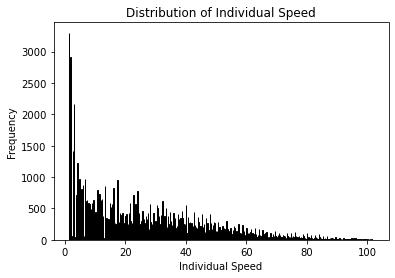

In [13]:
plt.hist(x = newlist, bins = 1000, color = 'steelblue', edgecolor = 'black')
plt.xlabel('Individual Speed')
plt.ylabel('Frequency')
plt.title('Distribution of Individual Speed')
plt.show()